In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Create helper functions

In [ ]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

## Generate output samples

In [4]:
#Generate a distribution array that is exponential but sums to 1 for any number of classes
def generate_distibution(number_of_classes):
    unscaled_distribution = np.array([1.5**i for i in range(number_of_classes)])
    scale = 1/sum(unscaled_distribution)
    scaled_distribution = unscaled_distribution * scale
    return scaled_distribution

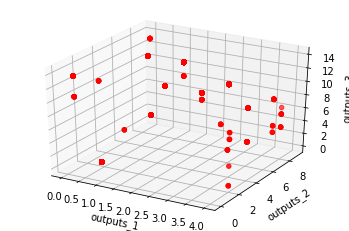

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random



def generate_ouputs(number_of_classes = 10,number_of_outputs = 1000):
    distribution = generate_distibution(number_of_classes)
    scaled_distribution = distribution*number_of_outputs
    classes = np.arange(number_of_classes)

    random.shuffle(distribution)
    random.shuffle(classes)

    output_labels = []
    #Sample from distribution
    for i,d in enumerate(scaled_distribution):
        #TODO:sample from a distribution centering around i, to introduce some randomness as all 3 labels are not always correlated
        vals = [classes[i] for p in range(round(d.item()))]
        output_labels = [*output_labels, *vals]

    return output_labels

number_of_output_classes_1 = 5
number_of_output_classes_2 = 10
number_of_output_classes_3 = 15

outputs_1 = generate_ouputs(number_of_output_classes_1)
outputs_2 = generate_ouputs(number_of_output_classes_2)
outputs_3 = generate_ouputs(number_of_output_classes_3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(outputs_1, outputs_2, outputs_3, c='r', marker='o')

ax.set_xlabel('outputs_1')
ax.set_ylabel('outputs_2')
ax.set_zlabel('outputs_3')

plt.show()

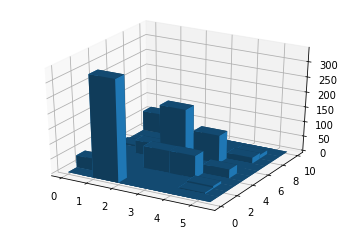

In [15]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(outputs_1, outputs_2, bins=10, range=[[0, 5], [0, 10]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

## Generate Input data

For each class label, the corresponding input should be centered around a unique point

In [16]:
# Move data into a pandas dataframe
df = pd.DataFrame(list(zip(outputs_1,outputs_2,outputs_3)),columns=['label1','label2','label3'])
df

,label1,label2,label3
0,4,2,3
1,4,2,8
2,4,2,8
3,4,2,0
4,4,2,0
...,...,...,...
996,1,0,2
997,1,0,2
998,1,0,2
999,1,0,2


In [25]:
# Generate input data based on the output class
def generate_normally_distributed_input_data(output_label):
    normal_value = np.random.normal(output_label + 1,1,1)
    return normal_value[0]

In [27]:
# add input columns to dataframe
df['input1'] = generate_normally_distributed_input_data(df['label1'])
df['input2'] = generate_normally_distributed_input_data(df['label2'])
df['input3'] = generate_normally_distributed_input_data(df['label3'])
df

,label1,label2,label3,input1,input2,input3
0,4,2,3,5.533811,2.908027,5.91382
1,4,2,8,5.533811,2.908027,5.91382
2,4,2,8,5.533811,2.908027,5.91382
3,4,2,0,5.533811,2.908027,5.91382
4,4,2,0,5.533811,2.908027,5.91382
...,...,...,...,...,...,...
996,1,0,2,5.533811,2.908027,5.91382
997,1,0,2,5.533811,2.908027,5.91382
998,1,0,2,5.533811,2.908027,5.91382
999,1,0,2,5.533811,2.908027,5.91382


In [109]:
#Prepare data for training
def prepare_data_for_training(df):
    inputs = df[['input1','input2','input3']].values
    outputs1 = pd.get_dummies(df[["label1"]], columns=['label1']).values
    outputs2 = pd.get_dummies(df[["label2"]], columns=['label2']).values
    outputs3 = pd.get_dummies(df[["label3"]], columns=['label3']).values
    return (inputs,outputs1,outputs2,outputs3)


#prepare_data_for_training(df)

(array([[5.53381091, 2.9080267 , 5.91382039],
        [5.53381091, 2.9080267 , 5.91382039],
        [5.53381091, 2.9080267 , 5.91382039],
        ...,
        [5.53381091, 2.9080267 , 5.91382039],
        [5.53381091, 2.9080267 , 5.91382039],
        [5.53381091, 2.9080267 , 5.91382039]]), array([[0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        ...,
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0]], dtype=uint8), array([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]], dtype=uint8))

In [90]:

# split the data into training and testing sets
# This will split the data up as we traditionally would with no over or under sampling
def split_dataset_randomly(df):
    msk = np.random.rand(len(df)) < 0.8
    train = df[msk]
    test = df[~msk]
    return (train,test)

In [104]:
# Split dataset with all classes of an output represented equally
def split_dataset_with_equal_class_representation(df):
    class_numbers = df.label3.unique()
    final_training_df = pd.DataFrame()     
    final_testing_df = pd.DataFrame() 

    print("number of unique classes",len(class_numbers))
    for class_number in class_numbers:
        class_df = df[df["label3"] == class_number]
        
        (training_df,testing_df) = split_dataset_randomly(class_df)
        
        final_training_df = pd.concat([final_training_df, training_df], axis=0)        
        final_testing_df = pd.concat([final_testing_df, testing_df], axis=0)

        
    return (final_training_df,final_testing_df)
    
split_dataset_with_equal_class_representation(df)

number of unique classes [ 3  8  0  7  6  4  9  5 10 13  1 11 12 14  2]


(      label1  label2  label3    input1    input2   input3
 1          4       2       8  5.533811  2.908027  5.91382
 3          4       2       0  5.533811  2.908027  5.91382
 4          4       2       0  5.533811  2.908027  5.91382
 5          4       2       0  5.533811  2.908027  5.91382
 6          4       2       7  5.533811  2.908027  5.91382
 ...      ...     ...     ...       ...       ...      ...
 994        1       0       2  5.533811  2.908027  5.91382
 996        1       0       2  5.533811  2.908027  5.91382
 998        1       0       2  5.533811  2.908027  5.91382
 999        1       0       2  5.533811  2.908027  5.91382
 1000       1       0       2  5.533811  2.908027  5.91382
 
 [780 rows x 6 columns],
      label1  label2  label3    input1    input2   input3
 0         4       2       3  5.533811  2.908027  5.91382
 2         4       2       8  5.533811  2.908027  5.91382
 12        4       8       6  5.533811  2.908027  5.91382
 17        4       8       4  5.5

## Build keras model

In [92]:
from keras.models import Model
from keras.layers import *    

inp = Input(shape=(3,))

x = Dense(100, activation='relu')(inp) 
x = Dense(40, activation='relu')(x) 

out1 = Dense(number_of_output_classes_1, activation='softmax')(x)  
out2 = Dense(number_of_output_classes_2, activation='softmax')(x)  
out3 = Dense(number_of_output_classes_3, activation='softmax')(x)  

model = Model(inp, [out1,out2,out3])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

model.summary()

Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           (None, 3)            0                                            
__________________________________________________________________________________________________
dense_76 (Dense)                (None, 100)          400         input_16[0][0]                   
__________________________________________________________________________________________________
dense_77 (Dense)                (None, 40)           4040        dense_76[0][0]                   
__________________________________________________________________________________________________
dense_78 (Dense)                (None, 5)            205         dense_77[0][0]                   
___________________________________________________________________________________________

# Test and compare model training Performance

In [93]:
epochs = 100
batch_size = 32

## Test performance on traditional splitting of datasets

In [118]:
# (train,test) = split_dataset_randomly(df)
# (training_inputs,training_outputs1,training_outputs2,training_outputs3) = prepare_data_for_training(train)
# (testing_inputs,testing_outputs1,testing_outputs2,testing_outputs3) = prepare_data_for_training(test)

[print(i) for i in testing_outputs3[0]]
[print(i) for i in testing_outputs3[1]]
[print(i) for i in testing_outputs3[3]]


    
print(len(testing_outputs3[0]))
print(testing_outputs3)

history = model.fit(training_inputs,[training_outputs1,training_outputs2,training_outputs3], 
                    validation_data=(testing_inputs,[testing_outputs1,testing_outputs2,testing_outputs3]),
                    epochs=epochs, 
                    batch_size=batch_size)

# Test performance on balanced splitting

In [119]:
(train,test) = split_dataset_with_equal_class_representation(df)
(training_inputs,training_outputs1,training_outputs2,training_outputs3) = prepare_data_for_training(train)
(testing_inputs,testing_outputs1,testing_outputs2,testing_outputs3) = prepare_data_for_training(test)

history = model.fit(training_inputs,[training_outputs1,training_outputs2,training_outputs3], 
                    validation_data=(testing_inputs,[testing_outputs1,testing_outputs2,testing_outputs3]),
                    epochs=100, batch_size=32)

number of unique classes [ 3  8  0  7  6  4  9  5 10 13  1 11 12 14  2]


ValueError: Error when checking target: expected dense_80 to have shape (15,) but got array with shape (11,)